In [1]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.9MB/s 
     |████████████████████████████████| 14.7MB 290kB/s 
     |████████████████████████████████| 10.9MB 42.5MB/s 


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [5]:
# mapa z województwami:
mapa_woj = gpd.read_file('wojewodztwa.shp')
mapa_woj

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,JPT_NAZWA1,JPT_ORGAN1,JPT_WAZNA_,ID_BUFORA_,ID_BUFORA1,ID_TECHNIC,IIP_PRZEST,IIP_IDENTY,IIP_WERSJA,JPT_KJ_IIP,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,WOJ,24,ÅlÄ skie,None,0,2017-10-10,None,2012-09-26,None,None,None,NZN,BRK,13890.0,0.0,1331323,PL.PZGIK.200,98a63fe6-1e56-4d05-9c47-ab4233f8a6ff,2017-10-10T00:00:00+02:00,EGIB,24,None,None,UZG,0,1331323,None,12.136952,1.557335,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51..."
1,WOJ,16,opolskie,None,0,2017-10-10,None,2012-09-26,None,None,None,NZN,BRK,13890.0,0.0,1331326,PL.PZGIK.200,9bd0c42a-ca40-4b7d-9b5b-81aae3398015,2017-10-10T00:00:00+02:00,EGIB,16,None,None,UZG,0,1331326,None,9.005207,1.196205,"POLYGON ((17.81203 51.18669, 17.81209 51.18670..."
2,WOJ,30,wielkopolskie,None,0,2016-05-05,None,2012-09-26,None,None,None,NZN,NZN,21408.0,0.0,829372,PL.PZGIK.200,c606b01a-76c8-480d-9470-f24ca0d7a613,2016-05-05T18:20:48+02:00,EGIB,30,None,None,UZG,0,1311516,None,18.408173,3.932196,"POLYGON ((16.71447 53.29913, 16.71447 53.29920..."
3,WOJ,26,ÅwiÄtokrzyskie,None,0,2012-09-26,None,2012-09-26,None,None,None,NZN,NZN,13890.0,0.0,829374,PL.PZGIK.200,d021c0dd-b22e-4fcd-8444-904c64ec3aa8,2012-09-27T13:45:13+02:00,EGIB,26,None,None,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((19.70430 50.75239, 19.70443 50.75248..."
4,WOJ,22,pomorskie,None,0,2020-04-09,None,2012-09-26,None,None,None,NZN,NZN,165374.0,0.0,829375,PL.PZGIK.200,ece93e09-0215-42f3-8067-be0649f58d46,2020-04-09T13:57:03+02:00,EGIB,22,None,None,UZG,0,1358902,None,13.167595,2.520630,"POLYGON ((17.66483 54.78297, 17.66653 54.78334..."
5,WOJ,04,kujawsko-pomorskie,None,0,2012-09-26,None,2012-09-26,None,None,None,NZN,NZN,13890.0,0.0,829380,PL.PZGIK.200,c26354a4-3043-4ca9-9105-df6f0f9c1d93,2012-09-27T13:45:13+02:00,EGIB,04,None,None,UZG,0,829380,None,12.394906,2.409414,"POLYGON ((17.65670 53.57115, 17.65672 53.57115..."
6,WOJ,20,podlaskie,None,0,2019-03-21,None,2012-09-26,None,None,None,NZN,BRK,112209.0,0.0,1331324,PL.PZGIK.200,53ad7aea-d9d3-40c9-9a5c-ff737d5b076e,2019-03-21T09:53:34+01:00,EGIB,20,None,None,UZG,0,1353685,None,11.101166,2.718484,"POLYGON ((21.98108 52.97859, 21.98078 52.97861..."
7,WOJ,32,zachodniopomorskie,None,0,2020-04-24,None,2012-09-26,None,None,None,NZN,BRK,166475.0,0.0,1331322,PL.PZGIK.200,c3f2202a-b491-49c5-a3af-d581108d939a,2020-04-24T13:47:42+02:00,EGIB,32,None,None,UZG,0,1358951,None,12.137158,3.107549,"POLYGON ((14.81157 54.04037, 14.89525 54.05570..."
8,WOJ,02,dolnoÅlÄ skie,None,0,2018-09-25,None,2012-09-26,None,None,None,NZN,BRK,90320.0,0.0,1331328,PL.PZGIK.200,f1ef3856-09ba-4e3d-af9d-a876794d570f,2018-09-25T11:27:46+02:00,EGIB,02,None,None,UZG,0,1348257,None,13.844520,2.559175,"POLYGON ((15.10534 51.42730, 15.10540 51.42732..."
9,WOJ,18,podkarpackie,None,0,2017-10-10,None,2012-09-26,None,None,None,NZN,BRK,13890.0,0.0,1331325,PL.PZGIK.200,833fe14b-fe8e-40c7-9e4e-fc27c938bb11,2017-10-10T00:00:00+02:00,EGIB,18,None,None,UZG,0,1331325,None,11.220452,2.235693,"POLYGON ((22.03538 50.80675, 22.03550 50.80681..."


In [6]:
mapa_woj = mapa_woj[['JPT_KOD_JE',"JPT_NAZWA_", "geometry"]]
mapa_woj

,JPT_KOD_JE,JPT_NAZWA_,geometry
0,24,ÅlÄ skie,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51..."
1,16,opolskie,"POLYGON ((17.81203 51.18669, 17.81209 51.18670..."
2,30,wielkopolskie,"POLYGON ((16.71447 53.29913, 16.71447 53.29920..."
3,26,ÅwiÄtokrzyskie,"POLYGON ((19.70430 50.75239, 19.70443 50.75248..."
4,22,pomorskie,"POLYGON ((17.66483 54.78297, 17.66653 54.78334..."
5,04,kujawsko-pomorskie,"POLYGON ((17.65670 53.57115, 17.65672 53.57115..."
6,20,podlaskie,"POLYGON ((21.98108 52.97859, 21.98078 52.97861..."
7,32,zachodniopomorskie,"POLYGON ((14.81157 54.04037, 14.89525 54.05570..."
8,02,dolnoÅlÄ skie,"POLYGON ((15.10534 51.42730, 15.10540 51.42732..."
9,18,podkarpackie,"POLYGON ((22.03538 50.80675, 22.03550 50.80681..."


In [51]:
dane_gus_wydatki_file = 'LUDN_1870_CTAB_20200621230237.csv'

In [52]:
wydatki_gus = pd.read_csv(dane_gus_wydatki_file, delimiter=';')
wydatki_gus



,Kod,Nazwa,ogółem;2018;[zł],napoje alkoholowe i wyroby tytoniowe;2018;[zł],rekreacja i kultura;2018;[zł],edukacja;2018;[zł],Unnamed: 6
0,0,POLSKA,"1186,86","29,56","76,93","12,31",NaN
1,200000,DOLNOŚLĄSKIE,"1282,80","32,92","90,44","13,06",NaN
2,400000,KUJAWSKO-POMORSKIE,"1149,82","31,21","66,16","9,06",NaN
3,600000,LUBELSKIE,"1085,66","23,27","65,13","8,18",NaN
4,800000,LUBUSKIE,"1143,84","33,34","72,70","12,36",NaN
5,1000000,ŁÓDZKIE,"1232,33","28,60","74,97","9,05",NaN
6,1200000,MAŁOPOLSKIE,"1017,42","23,57","58,48","9,87",NaN
7,1400000,MAZOWIECKIE,"1421,13","34,15","110,82","24,38",NaN
8,1600000,OPOLSKIE,"1189,77","33,22","77,36","9,20",NaN
9,1800000,PODKARPACKIE,"960,22","20,77","51,71","6,25",NaN


In [53]:
wydatki_gus = wydatki_gus.iloc[:, 0:6]
wydatki_gus.columns = ['Kod', 'Nazwa', 'ogółem', 'alkohol i tytoń', 'kultura i rekreacja', 'edukacja']
wydatki_gus

,Kod,Nazwa,ogółem,alkohol i tytoń,kultura i rekreacja,edukacja
0,0,POLSKA,"1186,86","29,56","76,93","12,31"
1,200000,DOLNOŚLĄSKIE,"1282,80","32,92","90,44","13,06"
2,400000,KUJAWSKO-POMORSKIE,"1149,82","31,21","66,16","9,06"
3,600000,LUBELSKIE,"1085,66","23,27","65,13","8,18"
4,800000,LUBUSKIE,"1143,84","33,34","72,70","12,36"
5,1000000,ŁÓDZKIE,"1232,33","28,60","74,97","9,05"
6,1200000,MAŁOPOLSKIE,"1017,42","23,57","58,48","9,87"
7,1400000,MAZOWIECKIE,"1421,13","34,15","110,82","24,38"
8,1600000,OPOLSKIE,"1189,77","33,22","77,36","9,20"
9,1800000,PODKARPACKIE,"960,22","20,77","51,71","6,25"


In [54]:
# kod ma być stringiem o stałejdługości (dodanie wiodących zer)
wydatki_gus['TERYT_gmn'] = wydatki_gus.Kod.apply(lambda x: '0'+str(x) if len(str(x)) < 7 else str(x))
 
# TERYT województwa
wydatki_gus['TERYT_woj'] = wydatki_gus.TERYT_gmn.apply(lambda s: s[:2])

wydatki_gus

,Kod,Nazwa,ogółem,alkohol i tytoń,kultura i rekreacja,edukacja,TERYT_gmn,TERYT_woj
0,0,POLSKA,"1186,86","29,56","76,93","12,31",00,00
1,200000,DOLNOŚLĄSKIE,"1282,80","32,92","90,44","13,06",0200000,02
2,400000,KUJAWSKO-POMORSKIE,"1149,82","31,21","66,16","9,06",0400000,04
3,600000,LUBELSKIE,"1085,66","23,27","65,13","8,18",0600000,06
4,800000,LUBUSKIE,"1143,84","33,34","72,70","12,36",0800000,08
5,1000000,ŁÓDZKIE,"1232,33","28,60","74,97","9,05",1000000,10
6,1200000,MAŁOPOLSKIE,"1017,42","23,57","58,48","9,87",1200000,12
7,1400000,MAZOWIECKIE,"1421,13","34,15","110,82","24,38",1400000,14
8,1600000,OPOLSKIE,"1189,77","33,22","77,36","9,20",1600000,16
9,1800000,PODKARPACKIE,"960,22","20,77","51,71","6,25",1800000,18


In [11]:
# łączymy tabelę opisującą kształt województw z danymi o wydatkach

dane_mapa_woj = pd.merge(mapa_woj, wydatki_gus, how='left', left_on='JPT_KOD_JE', right_on='TERYT_woj')
del dane_mapa_woj['JPT_NAZWA_']
del dane_mapa_woj['JPT_KOD_JE']
dane_mapa_woj

,geometry,Kod,Nazwa,ogółem,alkohol i tytoń,kultura i rekreacja,edukacja,TERYT_gmn,TERYT_woj
0,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51...",2400000,ŚLĄSKIE,"1288,63","34,42","94,22","10,37",2400000,24
1,"POLYGON ((17.81203 51.18669, 17.81209 51.18670...",1600000,OPOLSKIE,"1189,77","33,22","77,36","9,20",1600000,16
2,"POLYGON ((16.71447 53.29913, 16.71447 53.29920...",3000000,WIELKOPOLSKIE,"1051,66","24,98","62,23","11,24",3000000,30
3,"POLYGON ((19.70430 50.75239, 19.70443 50.75248...",2600000,ŚWIĘTOKRZYSKIE,"1075,11","23,01","55,51","7,45",2600000,26
4,"POLYGON ((17.66483 54.78297, 17.66653 54.78334...",2200000,POMORSKIE,"1288,99","38,31","81,44","15,50",2200000,22
5,"POLYGON ((17.65670 53.57115, 17.65672 53.57115...",400000,KUJAWSKO-POMORSKIE,"1149,82","31,21","66,16","9,06",0400000,04
6,"POLYGON ((21.98108 52.97859, 21.98078 52.97861...",2000000,PODLASKIE,"1066,10","24,78","53,63","7,70",2000000,20
7,"POLYGON ((14.81157 54.04037, 14.89525 54.05570...",3200000,ZACHODNIOPOMORSKIE,"1236,53","31,48","74,20","11,59",3200000,32
8,"POLYGON ((15.10534 51.42730, 15.10540 51.42732...",200000,DOLNOŚLĄSKIE,"1282,80","32,92","90,44","13,06",0200000,02
9,"POLYGON ((22.03538 50.80675, 22.03550 50.80681...",1800000,PODKARPACKIE,"960,22","20,77","51,71","6,25",1800000,18


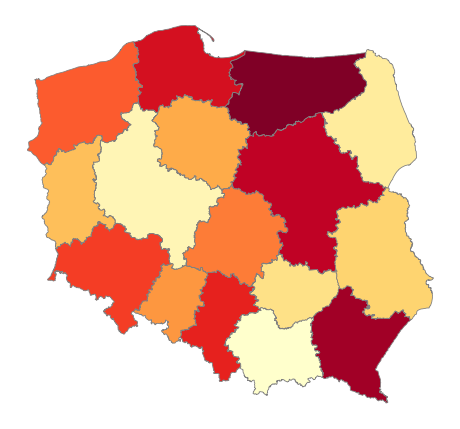

In [12]:
## rysujemy mapkę:
dane_mapa_woj = dane_mapa_woj.to_crs(epsg=2180)
 
fig, ax = plt.subplots(1, figsize = (8,8))
dane_mapa_woj.plot(column='ogółem', ax=ax, cmap='YlOrRd', linewidth=0.8, edgecolor='gray')

ax.axis('off')

# pokazujemy obrazek
plt.show()

In [55]:
#wydatki_gus['ogółem'] = pd.to_numeric(wydatki_gus['ogółem'])
wydatki_gus['ogółem'] = wydatki_gus['ogółem'].str.replace(',', '.')
wydatki_gus['alkohol i tytoń'] = wydatki_gus['alkohol i tytoń'].str.replace(',', '.')
wydatki_gus['kultura i rekreacja'] = wydatki_gus['kultura i rekreacja'].str.replace(',', '.')
wydatki_gus['edukacja'] = wydatki_gus['edukacja'].str.replace(',', '.')

wydatki_gus['ogółem'] = wydatki_gus['ogółem'].astype(str).astype(float)
wydatki_gus['alkohol i tytoń'] = wydatki_gus['alkohol i tytoń'].astype(str).astype(float)
wydatki_gus['kultura i rekreacja'] = wydatki_gus['kultura i rekreacja'].astype(str).astype(float)
wydatki_gus['edukacja'] = wydatki_gus['edukacja'].astype(str).astype(float)


print (wydatki_gus.dtypes)
wydatki_gus

Kod                      int64
Nazwa                   object
ogółem                 float64
alkohol i tytoń        float64
kultura i rekreacja    float64
edukacja               float64
TERYT_gmn               object
TERYT_woj               object
dtype: object


,Kod,Nazwa,ogółem,alkohol i tytoń,kultura i rekreacja,edukacja,TERYT_gmn,TERYT_woj
0,0,POLSKA,1186.86,29.56,76.93,12.31,00,00
1,200000,DOLNOŚLĄSKIE,1282.80,32.92,90.44,13.06,0200000,02
2,400000,KUJAWSKO-POMORSKIE,1149.82,31.21,66.16,9.06,0400000,04
3,600000,LUBELSKIE,1085.66,23.27,65.13,8.18,0600000,06
4,800000,LUBUSKIE,1143.84,33.34,72.70,12.36,0800000,08
5,1000000,ŁÓDZKIE,1232.33,28.60,74.97,9.05,1000000,10
6,1200000,MAŁOPOLSKIE,1017.42,23.57,58.48,9.87,1200000,12
7,1400000,MAZOWIECKIE,1421.13,34.15,110.82,24.38,1400000,14
8,1600000,OPOLSKIE,1189.77,33.22,77.36,9.20,1600000,16
9,1800000,PODKARPACKIE,960.22,20.77,51.71,6.25,1800000,18


In [58]:
stats = wydatki_gus.iloc[:, 2:6]
stats.describe()

,ogółem,alkohol i tytoń,kultura i rekreacja,edukacja
count,17.000000,17.000000,17.000000,17.000000
mean,1156.395882,29.028235,71.731176,11.005294
std,126.133716,5.096884,16.237845,4.154565
min,960.220000,20.770000,51.710000,6.250000
25%,1066.100000,24.780000,58.480000,9.050000
50%,1149.820000,29.560000,72.700000,9.870000
75%,1236.530000,33.220000,77.360000,12.310000
max,1421.130000,38.310000,110.820000,24.380000


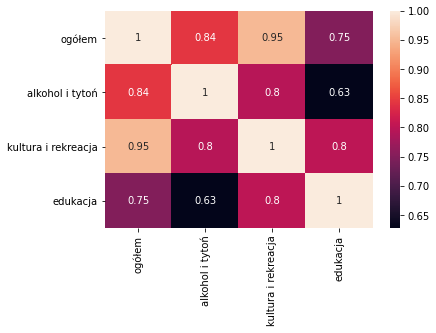

In [59]:
import seaborn as sn

corrMatrix = stats.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Jak widzimy i mogliśmy się domyślić istnieje silna korelacja pomiędzy wydatkami na poszczególne kategorie